IMPORT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA VISUALIZATION

In [5]:
df=pd.read_csv("Titanic-Dataset.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


OUTLIER DETECTION

<Axes: >

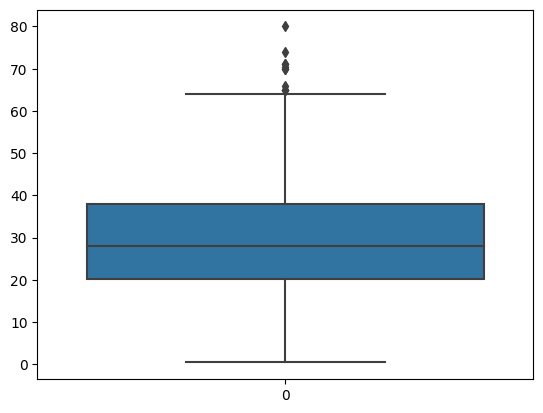

In [16]:
sns.boxplot(df.Age)

In [17]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)

In [18]:
print(q1)
print(q3)

20.125
38.0


In [19]:
IQR=q3-q1

In [20]:
IQR

17.875

In [21]:
upper_limit=q3+1.5*IQR

In [23]:
upper_limit

64.8125

In [24]:
df.median()

<ipython-input-24-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [26]:
df['Age']=np.where(df['Age']>upper_limit,28,df['Age'])

<Axes: >

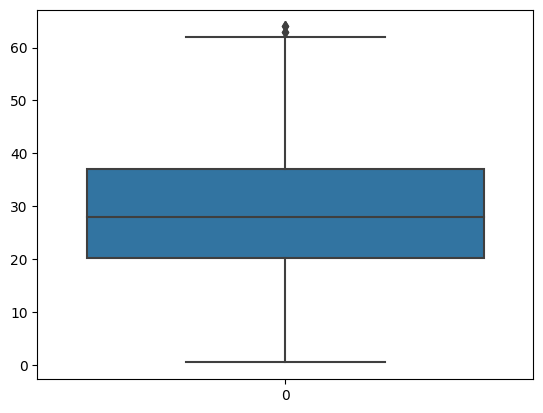

In [27]:
sns.boxplot(df.Age)

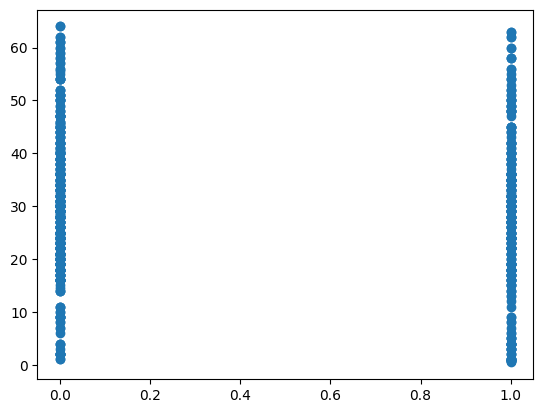

In [28]:
plt.scatter(df['Survived'],df['Age'])

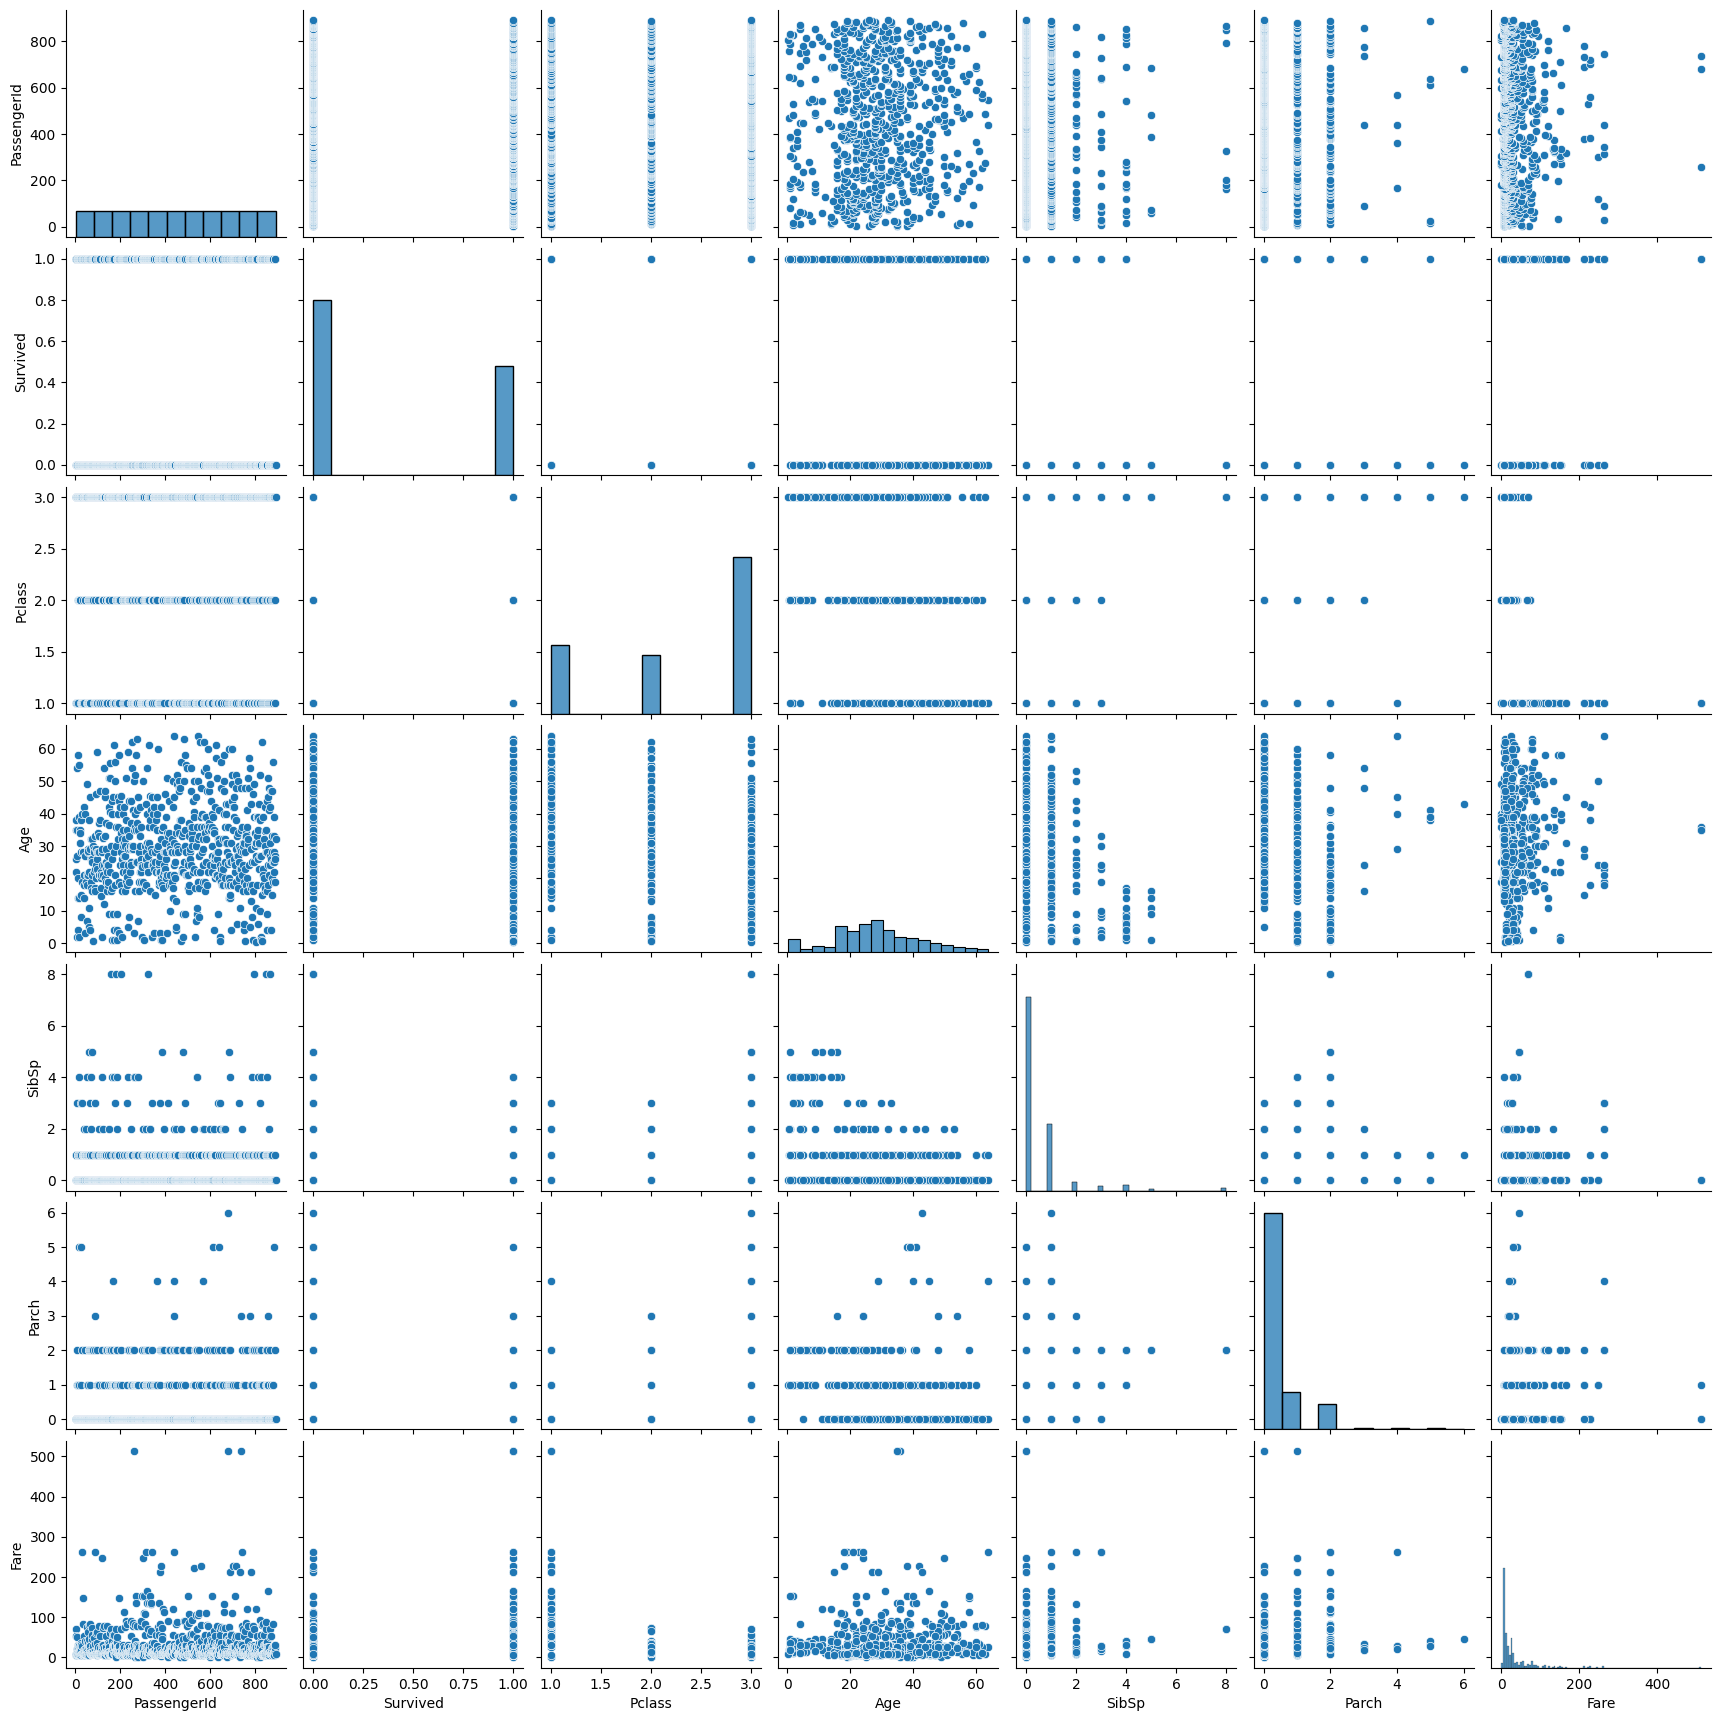

In [29]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='PassengerId'>

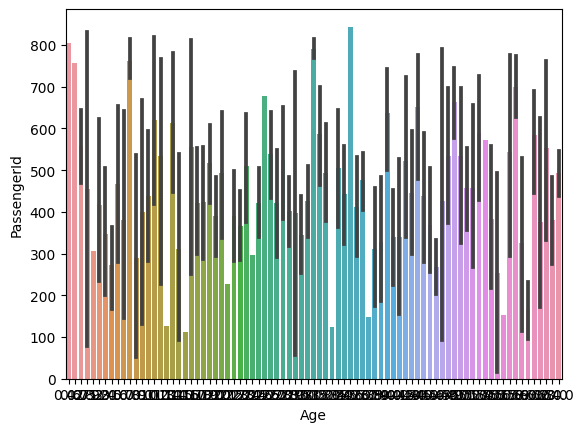

In [30]:
sns.barplot(x=df['Age'],y=df['PassengerId'])

In [33]:
X=df.drop(columns=['Age'],axis=1)
X.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


In [35]:
X.shape

(891, 11)

In [37]:
type(X)

pandas.core.frame.DataFrame

In [38]:
y=df['Age']
y.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

ENCODING

In [40]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
X["Embarked"]=le.fit_transform(X["Embarked"])

In [42]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,2


In [43]:
print(le.classes_)

['C' 'Q' 'S' nan]


In [44]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2, nan: 3}

FEATURE SCALING

In [48]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [55]:
df = pd.DataFrame(X.head())

In [56]:
numerical_cols = ['Pclass', 'SibSp', 'Parch', 'Fare']

In [57]:
scaler_minmax = MinMaxScaler()
df[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

In [62]:
scaler_zscore = StandardScaler()
df[numerical_cols] = scaler_zscore.fit_transform(df[numerical_cols])


In [66]:
X_Scaled=df.head()

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0.816497,"Braund, Mr. Owen Harris",male,0.816497,0.0,A/5 21171,-0.816141,NaN,2
1,2,1,-1.224745,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.816497,0.0,PC 17599,1.530347,C85,0
2,3,1,0.816497,"Heikkinen, Miss. Laina",female,-1.224745,0.0,STON/O2. 3101282,-0.791405,NaN,2
3,4,1,-1.224745,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.816497,0.0,113803,0.864024,C123,2
4,5,0,0.816497,"Allen, Mr. William Henry",male,-1.224745,0.0,373450,-0.786825,NaN,2


TRAIN TEST SPLIT

In [70]:
from sklearn.model_selection import train_test_split


In [73]:
X = df.drop(columns=['Survived', 'Name', 'Sex', 'Ticket', 'Cabin'])  # Drop non-numeric columns
y = df['Survived']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)